

Question to answer, geographically, how do the locations of encampments compare to the reports for behavior

The source of the information is from the San Francisco Open Data Portal
On that portal, I've created a dataset of Encampments
https://data.sfgov.org/profile/Gregory/xm4t-k5h4?q=encampment&sortBy=relevance&utf8=%E2%9C%93


# San Francisco Graffiti with Video





Import Libraries & get url


In [41]:
#url = 'https://data.sfgov.org/resource/gbya-e2d3.csv' // homeless
url = 'https://data.sfgov.org/resource/rme2-xgvs.csv'
url = url + '?$limit=50000'
url2 = url + '&$offset=50000'
print(url)
print(url2)

https://data.sfgov.org/resource/rme2-xgvs.csv?$limit=50000
https://data.sfgov.org/resource/rme2-xgvs.csv?$limit=50000&$offset=50000


In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline




## Set Display Column with wider so no problem with Media URL series

In [18]:
pd.options.display.max_colwidth=115

## Setup to display images - working, work to do

In [19]:
from IPython.display import Image
from IPython.core.display import HTML 
from IPython.core.display import Image, display



### get url

In [47]:
df1 = pd.read_csv(url)
df2 = pd.read_csv(url2)
df =  pd.concat([df1,df2])

In [48]:
df.shape

(68877, 16)

In [49]:
df.head(3)

,CaseID,Opened,Closed,Updated,Status,Status Notes,Responsible Agency,Category,Request Type,Request Details,Address,Supervisor District,Neighborhood,Point,Source,Media URL
0,6606742,12/08/2016 12:58:47 AM,NaN,12/08/2016 01:21:23 AM,Open,Open,PUC - Water - Graffiti Queue,Graffiti Public Property,Not_Offensive Graffiti on Public Property,Fire_hydrant - Not_Offensive,Intersection of PINE ST and STOCKTON ST,3.0,Nob Hill,"(37.7912981240787, -122.407322888067)",Open311,NaN
1,6606673,12/07/2016 10:53:54 PM,NaN,12/07/2016 11:24:49 PM,Open,accepted,DPW Ops Queue,Graffiti Public Property,Not_Offensive Graffiti on Public Property,Pole - Not_Offensive,Intersection of BRODERICK ST and FULTON ST,5.0,Western Addition,"(37.7766439946699, -122.439844187879)",Open311,http://mobile311.sfgov.org/media/san_francisco/report/photos/584903753da19793c74c3848/report.jpg
2,6606441,12/07/2016 07:41:29 PM,NaN,12/07/2016 08:22:37 PM,Open,accepted,DPW Ops Queue,Graffiti Private Property,Not_Offensive Graffiti on Private Property,Sidewalk_in_front_of_property - Not_Offensive,"1594 LA PLAYA, SAN FRANCISCO, CA, 94122",4.0,Outer Sunset,"(37.756714805968, -122.508730604706)",Open311,http://mobile311.sfgov.org/media/san_francisco/report/photos/5839d3633da18eff3daa3174/report.jpg


In [ ]:
df['Opened'] = pd.to_datetime(df['Opened'])
df['Closed'] = pd.to_datetime(df['Closed'])
df['Updated'] = pd.to_datetime(df['Updated'])

In [ ]:
df.head(3)

In [ ]:
df.Closed.dt.day.value_counts().sort_index().plot()

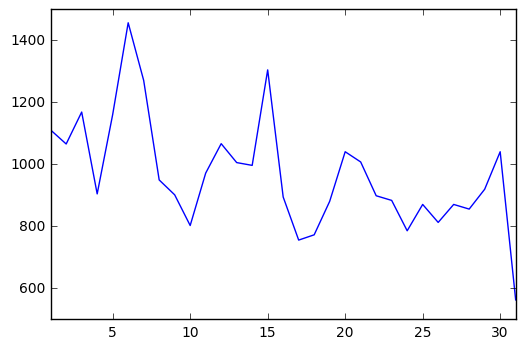

In [31]:
df.Opened.dt.day.value_counts().sort_index().plot()

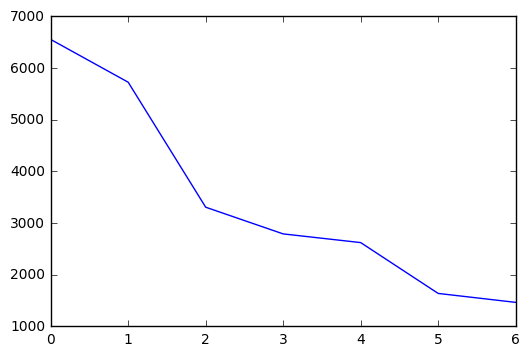

In [32]:
df.Closed.dt.weekday.value_counts().sort_index().plot()

In [33]:
df.columns

Index(['CaseID', 'Opened', 'Closed', 'Updated', 'Status', 'Status Notes',
       'Responsible Agency', 'Category', 'Request Type', 'Request Details',
       'Address', 'Supervisor District', 'Neighborhood', 'Point', 'Source',
       'Media URL'],
      dtype='object')

In [34]:

df['Request Details'].value_counts()


Other_enter_additional_details_below - Offensive             3570
Building_commercial - Not_Offensive                          3548
Pole - Not_Offensive                                         2202
Building_other - Not_Offensive                               1866
Signal_box - Not_Offensive                                   1678
Mail_box - Not_Offensive                                     1644
Transit_Shelter_Platform - Not_Offensive                     1574
Sidewalk_in_front_of_property - Not_Offensive                1561
Building_commercial - Offensive                              1112
Building_residential - Not_Offensive                         1057
Pole - Offensive                                             1002
Sidewalk_in_front_of_property - Offensive                     823
Parking_meter - Not_Offensive                                 818
News_rack - Not_Offensive                                     659
Fire_hydrant - Not_Offensive                                  656
Signal_box

In [35]:
df['Supervisor District'].value_counts().sort_index()



-1.0        6
 0.0      114
 1.0     1705
 2.0      740
 3.0     5847
 4.0      634
 5.0     4385
 6.0     3589
 7.0      645
 8.0     4106
 9.0     5451
 10.0    1778
 11.0     971
Name: Supervisor District, dtype: int64

In [15]:
df.Neighborhood.value_counts()

Mission                         209
South of Market                 187
Showplace Square                 74
Castro                           59
Civic Center                     35
Rincon Hill                      32
Mission Bay                      32
Mission Dolores                  31
Potrero Hill                     29
South Beach                      26
Duboce Triangle                  25
Lower Haight                     17
Lower Nob Hill                   16
Tenderloin                       15
Marina                           15
Financial District               15
Silver Terrace                   13
Haight Ashbury                   12
Hayes Valley                     10
Produce Market                   10
Apparel City                      9
Western Addition                  7
Cathedral Hill                    7
Bernal Heights                    7
Inner Richmond                    6
Central Waterfront                6
Outer Richmond                    5
Polk Gulch                  

In [16]:
df[df.Neighborhood == 'Mission'].head(8)

,CaseID,Opened,Closed,Updated,Status,Status Notes,Responsible Agency,Category,Request Type,Request Details,Address,Supervisor District,Neighborhood,Point,Source,Media URL
0,6606678,2016-12-07 23:02:46,NaT,2016-12-07 23:04:43,Open,accepted,DPW Ops Queue,Street and Sidewalk Cleaning,Illegal Encampment,Encampment Cleanup,Intersection of SOUTH VAN NESS AVE and 26TH ST,9.0,Mission,"(37.7491721206718, -122.415954626097)",Voice In,NaN
2,6606526,2016-12-07 20:29:00,NaT,2016-12-07 22:22:23,Open,open,DPW Ops Queue,Street and Sidewalk Cleaning,Illegal Encampment,Encampment Cleanup,"1880 MISSION ST, SAN FRANCISCO, CA, 94103",9.0,Mission,"(37.767159874561, -122.420032495993)",Open311,http://mobile311.sfgov.org/media/san_francisco/report/photos/5848e1823da19793c74c374e/report.jpg
15,6606377,2016-12-07 19:24:12,NaT,2016-12-07 19:24:12,Open,accepted,DPW Ops Queue,Street and Sidewalk Cleaning,Illegal Encampment,Encampment Cleanup,Intersection of 20TH ST and FLORIDA ST,9.0,Mission,"(37.7591338604323, -122.410758686679)",Open311,http://mobile311.sfgov.org/media/san_francisco/report/photos/5848d2503da19793c74c36ad/photo_20161207_192257.jpg
36,6604566,2016-12-07 11:24:52,NaT,2016-12-07 11:43:26,Open,open,DPW Ops Queue,Street and Sidewalk Cleaning,Illegal Encampment,Encampment Cleanup,"499 ALABAMA ST, SAN FRANCISCO, CA, 94110",9.0,Mission,"(37.763566099551, -122.412057986203)",Voice In,NaN
38,6604282,2016-12-07 10:20:54,2016-12-07 12:13:41,2016-12-07 12:13:41,Closed,Case is Invalid - Need to report to SFPD - Occupied vehicle.,311 Supervisor Queue,Street and Sidewalk Cleaning,Illegal Encampment,Encampment Cleanup,"1800 FOLSOM ST, SAN FRANCISCO, CA, 94103",9.0,Mission,"(37.767899373303, -122.415713852066)",Voice In,NaN
41,6604079,2016-12-07 09:46:09,2016-12-07 12:24:19,2016-12-07 12:24:19,Closed,Insufficient Information - Insufficient infomation provided for action to be taken.,Police - Homeless Concerns Queue,Street and Sidewalk Cleaning,Illegal Encampment,Encampment Cleanup,Intersection of 16TH ST and VALENCIA ST,8.0,Mission,"(37.7649173279987, -122.421886343791)",Open311,http://mobile311.sfgov.org/media/san_francisco/report/photos/58484ad73da19793c74c22fb/photo_20161207_094439.jpg
46,6603868,2016-12-07 09:11:38,NaT,2016-12-07 09:12:34,Open,accepted,DPW Ops Queue,Street and Sidewalk Cleaning,Illegal Encampment,Encampment Cleanup,Intersection of DIVISION ST and BRANNAN ST,6.0,Mission,"(37.769243953611, -122.408007171216)",Voice In,NaN
50,6603544,2016-12-07 08:17:44,2016-12-07 08:55:12,2016-12-07 08:55:12,Closed,Area Cleaned -,DPW Ops Queue,Street and Sidewalk Cleaning,Illegal Encampment,Encampment Cleanup,"238 CAPP ST, SAN FRANCISCO, CA, 94110",9.0,Mission,"(37.762869104608, -122.418485437715)",Voice In,NaN



### Get rid of NaN entries and display images

Need Help  https://youtu.be/2AFGPdNn4FM?t=8m

In [17]:
#hl_images = df[df['Media URL'].notnull() ]['Media URL']


In [18]:

images = df[df['Media URL'].notnull() ]['Media URL']
images = images.reset_index(drop=True)
print(images[:3])


0                   http://mobile311.sfgov.org/media/san_francisco/report/photos/5848e1823da19793c74c374e/report.jpg
1                   http://mobile311.sfgov.org/media/san_francisco/report/photos/5848d8743da19793c74c36e6/report.jpg
2    http://mobile311.sfgov.org/media/san_francisco/report/photos/5839a4ff3da18eff3daa2d9c/photo_20161126_070615.jpg
Name: Media URL, dtype: object


In [19]:
images[0]

'http://mobile311.sfgov.org/media/san_francisco/report/photos/5848e1823da19793c74c374e/report.jpg'

http://mobile311.sfgov.org/media/san_francisco/report/photos/5848e1823da19793c74c374e/report.jpg


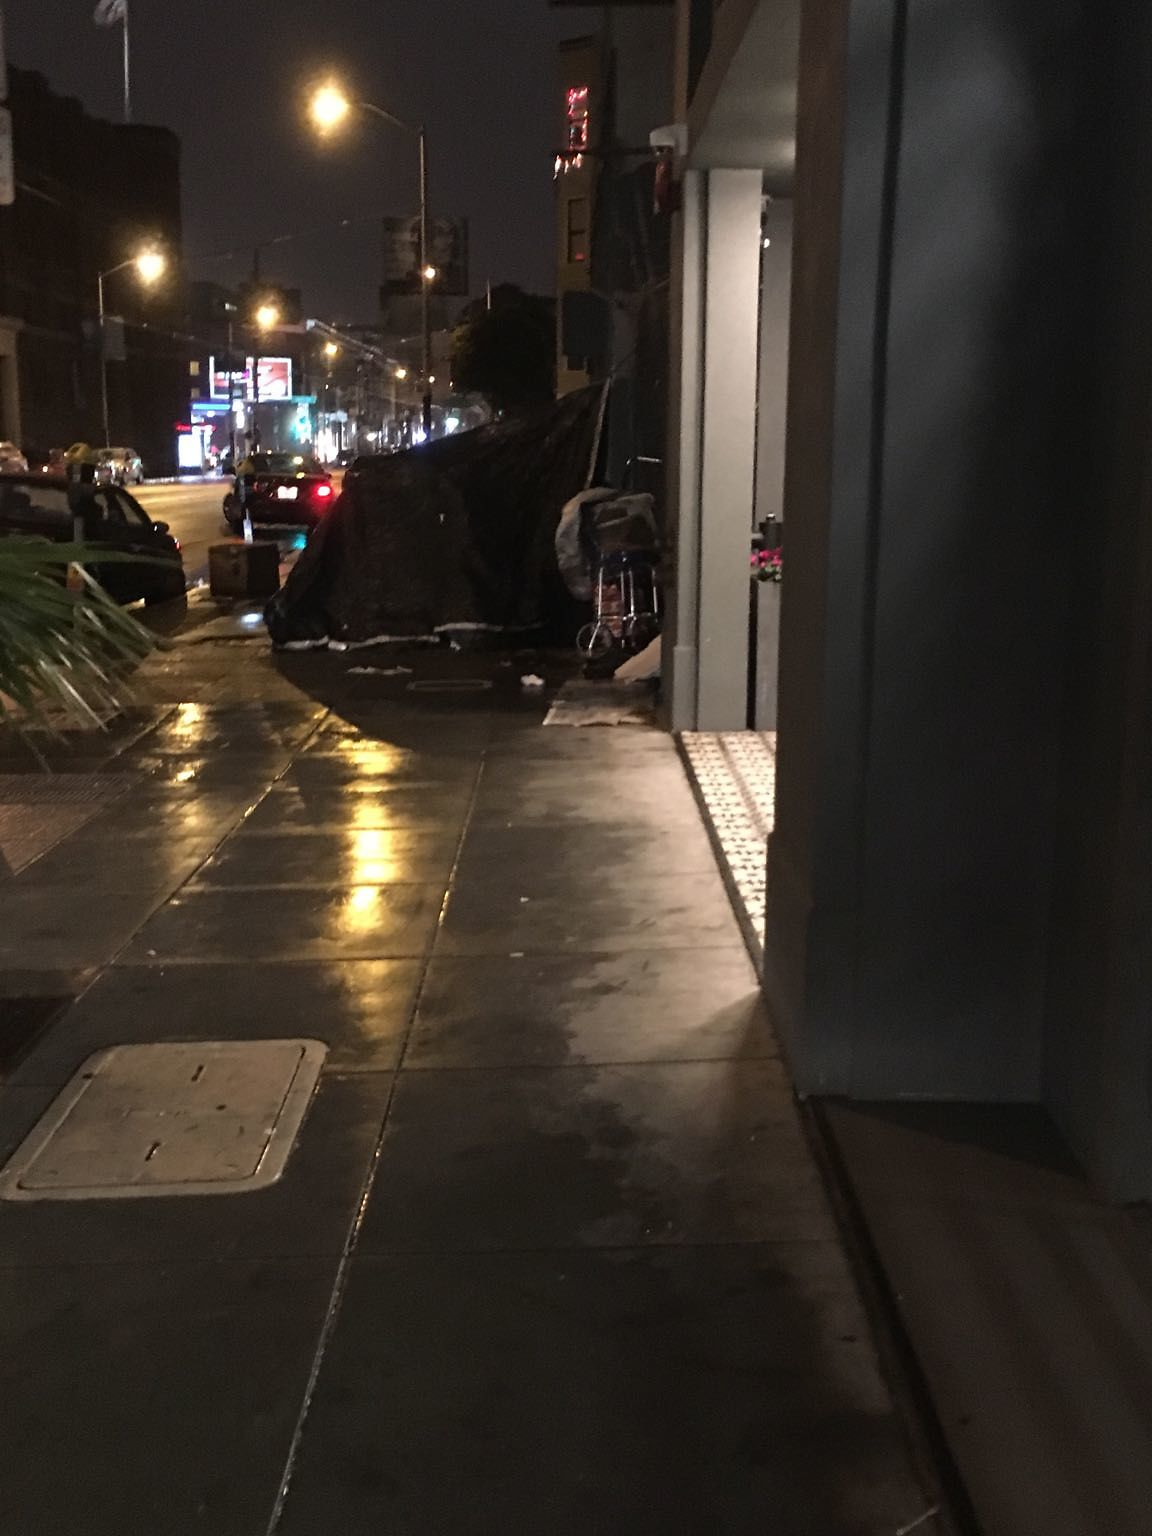

In [20]:
print(images[0])
Image(images[0])


In [61]:
%cd ..


/home/gdillon/JupyterPractice/Homeless_SF311


In [62]:
images[:20].to_csv("./assets/imagelist.txt", index=False)

In [63]:

%cd assets/
!wget -i imagelist.txt
%rm imagelist.txt
%ls | gawk 'BEGIN{ a=1 }{ printf "mv \"%s\" %04d.jpg\n", $0, a++ }' | bash
%convert -delay 50 *.jpg out.mp4


/home/gdillon/JupyterPractice/Homeless_SF311/assets
--2016-12-08 22:40:55--  http://mobile311.sfgov.org/media/san_francisco/report/photos/5848e1823da19793c74c374e/report.jpg
Resolving mobile311.sfgov.org (mobile311.sfgov.org)... 54.144.250.241
Connecting to mobile311.sfgov.org (mobile311.sfgov.org)|54.144.250.241|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 137510 (134K) [image/jpeg]
Saving to: 'report.jpg'

report.jpg          100%[===================>] 134.29K   686KB/s    in 0.2s    

2016-12-08 22:40:56 (686 KB/s) - 'report.jpg' saved [137510/137510]

--2016-12-08 22:40:56--  http://mobile311.sfgov.org/media/san_francisco/report/photos/5848d8743da19793c74c36e6/report.jpg
Reusing existing connection to mobile311.sfgov.org:80.
HTTP request sent, awaiting response... 200 OK
Length: 537867 (525K) [image/jpeg]
Saving to: 'report.jpg.1'

report.jpg.1        100%[===================>] 525.26K  3.24MB/s    in 0.2s    

2016-12-08 22:40:56 (3.24 MB/s) - 'report.j

In [66]:
#!convert -delay 50 *.jpg out.mp4


In [67]:
!ls


0008.jpg  0014.jpg  0020.jpg		       photo_20161207_094439.jpg
0009.jpg  0015.jpg  out.mp4		       photo_20161207_192257.jpg
0010.jpg  0016.jpg  photo_20161126_070615.jpg  report.jpg
0011.jpg  0017.jpg  photo_20161206_180221.jpg
0012.jpg  0018.jpg  photo_20161207_092916.jpg
0013.jpg  0019.jpg  photo_20161207_093041.jpg


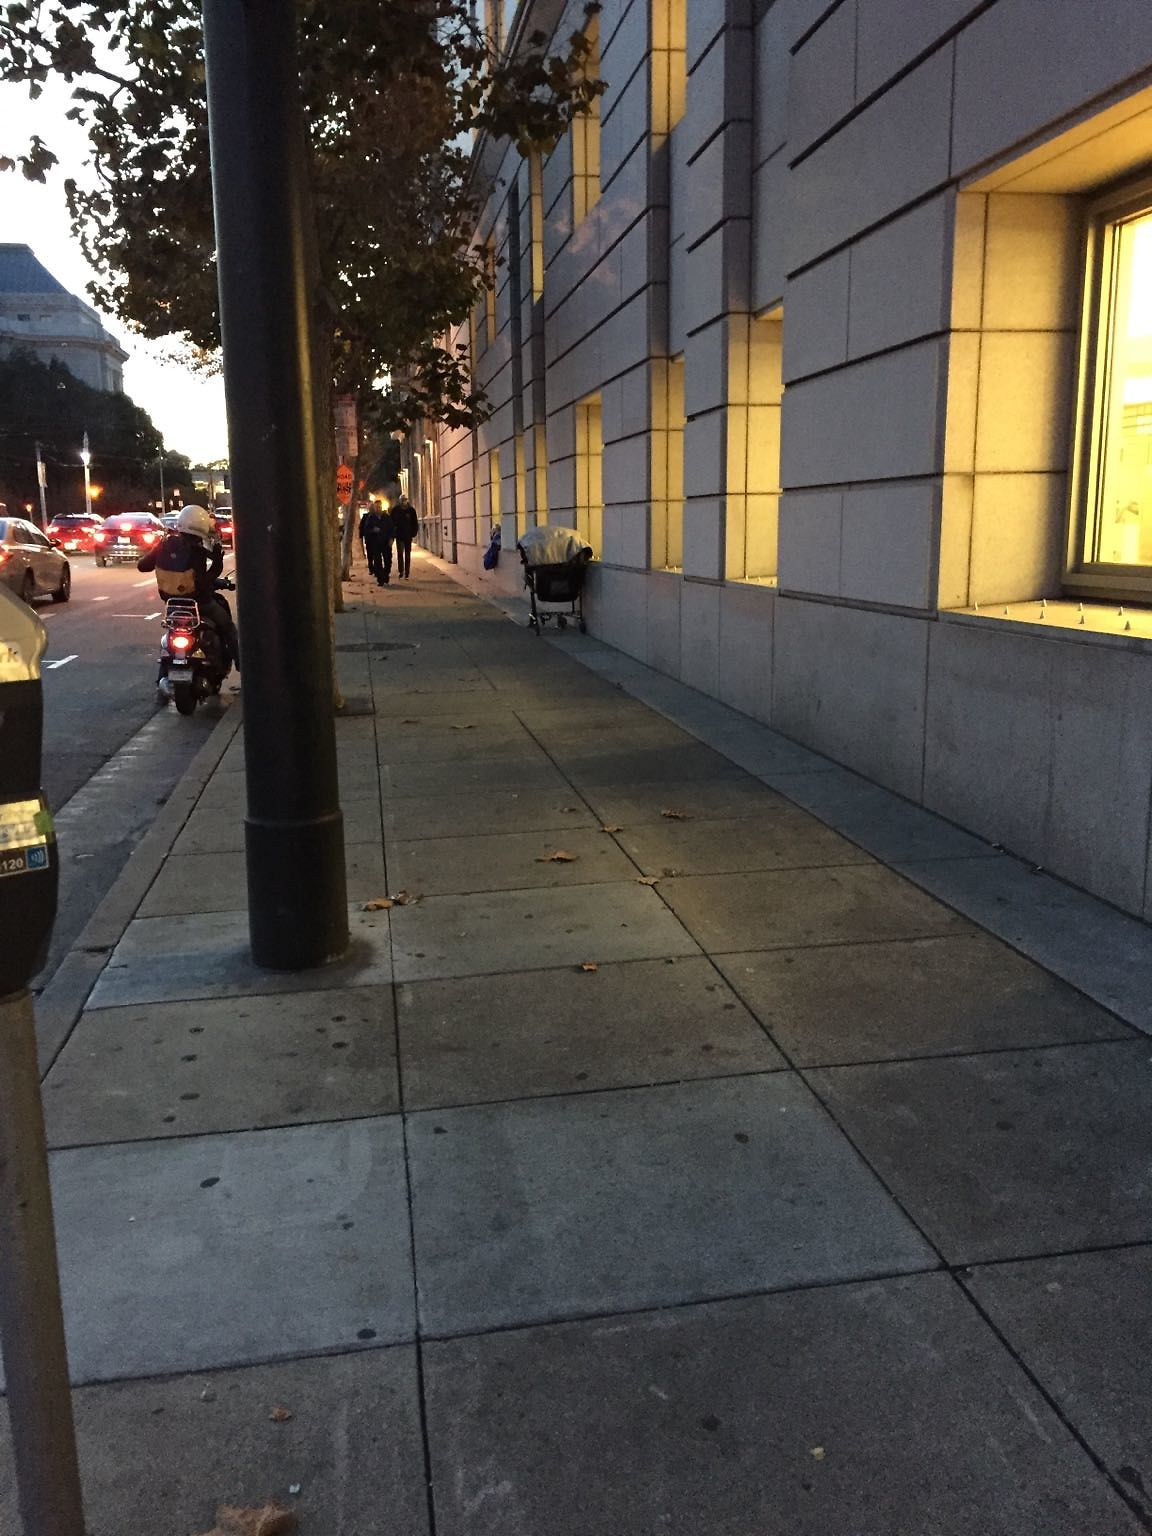

In [29]:
Image('report2.jpg')